In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

data = {
    'Males_Hours': [12, 7, 7, 10, 8, 10, 11, 9, 9, 13,
                    4, 9, 12, 11, 9, 9, 7, 12, 10, 13,
                    11, 10, 6, 12, 11, 9, 10, 12, 8, 9,
                    13, 10, 9, 7, 10, 7, 10, 8, 11, 10,
                    11, 7, 15, 8, 9, 9, 11, 13, 10, 13],
    'Females_Hours': [11, 10, 11, 10, 11, 12, 12, 10, 9, 9,
                      9, 10, 8, 7, 12, 9, 7, 8, 9, 8,
                      7, 7, 9, 9, 12, 10, 9, 13, 9, 9,
                      10, 9, 6, 12, 8, 11, 8, 8, 11, 12,
                      9, 10, 11, 14, 12, 7, 11, 10, 9, 11]
}

df = pd.DataFrame(data)

In [2]:
# 1. Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on 
#    cell phones by male and female college students per week. 
# Null hypothesis (H0): μ_males = μ_females
# Alternative hypothesis (H1): μ_males ≠ μ_females
# The researcher wants to determine if there's a difference in the mean time spent on cell phones by male and female students. 
# Perform an independent two-sample t-test because we are comparing the means of two separate groups.
# Explanation: The null hypothesis assumes no difference in the mean phone usage time between males and females, while the 
# alternative hypothesis suggests there is a difference. The independent t-test is appropriate as we are comparing two
# independent groups.

T-statistic: 0.304, P-value: 0.762
Fail to reject the null hypothesis: No significant difference between the means; Equal.


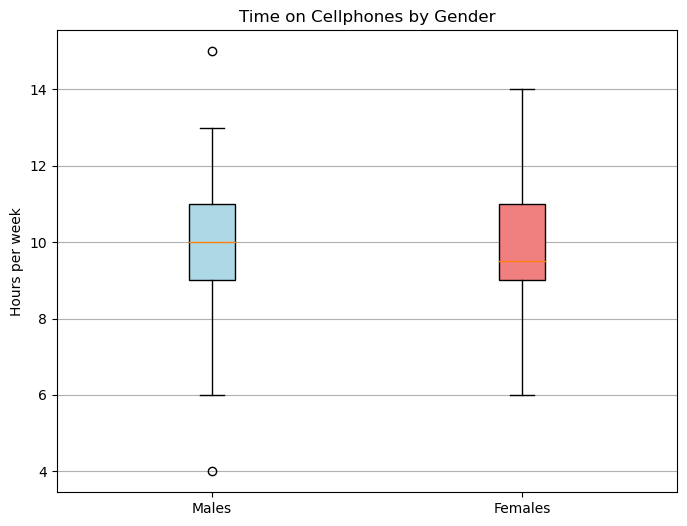


T-statistic (without outliers): 0.3603099717473574
P-value (without outliers): 0.719414756576146

T-statistic (with outliers): 0.30394907866566184
P-value (with outliers): 0.7618345408177143


In [3]:
# 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your 
#    recommendation for the researcher?
t_statistic, p_val = stats.ttest_ind(df['Males_Hours'], df['Females_Hours'], equal_var=False)
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_val:.3f}")

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means; Unequal.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the means; Equal.")

labels = ['Males', 'Females']
data = [df['Males_Hours'].values, df['Females_Hours'].values]
plt.figure(figsize=(8, 6))
box = plt.boxplot(data, labels=labels, patch_artist=True)
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Time on Cellphones by Gender')
plt.ylabel('Hours per week')
plt.grid(axis='y')
plt.show()

outliers_male = [4, 15]  
data_m_no_outliers = [x for x in df['Males_Hours'] if x not in outliers_male]
t_stat_no_outliers, p_val_no_outliers = stats.ttest_ind(data_m_no_outliers, df['Females_Hours'], equal_var=False)

print("\nT-statistic (without outliers):", t_stat_no_outliers)
print("P-value (without outliers):", p_val_no_outliers)

print("\nT-statistic (with outliers):", t_statistic)
print("P-value (with outliers):", p_val)

# Explanation: The code performs an independent t-test to determine if there is a significant difference between the means. 
# The p-value is compared to a significance level (α = 0.05). If the p-value is less than 0.05, we reject the null hypothesis; 
# otherwise, we fail to reject it. The box plot visualizes the distribution of hours spent on cellphones by males and females.

# Since the difference in p-values with and without outliers is small, it does not change the conclusion of the test. These 
# outliers can provide a more accurate result as they are part of the original dataset.

In [4]:
# 3. Provide descriptive statistical summaries of the data for each gender category.
def descriptive_summary(df, column_name):
    data_np = pd.DataFrame(df, columns=[column_name])

    valid = len(data_np)
    mean = data_np[column_name].mean()
    std_dv = data_np[column_name].std(ddof=1)
    var = data_np[column_name].var(ddof=1)
    skewness = stats.skew(data_np[column_name])
    kurtosis = stats.kurtosis(data_np[column_name])
    
    n = valid
    std_error_skewness = np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3)))
    std_error_kurtosis = np.sqrt(24 / n)
    
    min_val = data_np[column_name].min()
    max_val = data_np[column_name].max()
    mode_val = stats.mode(data_np[column_name], keepdims=True)[0][0]
    median = data_np[column_name].median()

    Q1 = np.percentile(data_np[column_name], 25)
    Q2 = np.percentile(data_np[column_name], 50)
    Q3 = np.percentile(data_np[column_name], 75)
    D9 = np.percentile(data_np[column_name], 90)
    P95 = np.percentile(data_np[column_name], 95)

    dp_summary = {
        'Valid': valid,
        'Mode': mode_val,
        'Median': median,
        'Mean': mean,
        'Std. deviation': std_dv,
        'Variance': var,
        'Skewness': skewness,
        'Std. Error of Skewness': std_error_skewness,
        'Kurtosis': kurtosis, 
        'Std. Error of Kurtosis': std_error_kurtosis,
        'Minimum': min_val, 
        'Maximum': max_val, 
        'Q1 (25th percentile)': Q1,
        'Q2 (50th percentile)': Q2,
        'Q3 (75th percentile)': Q3,
        'D9 (90th percentile)': D9,
        'P95 (95th percentile)': P95
    }

    return pd.DataFrame(dp_summary.items(), columns=['Measures', 'Value']).round(3)

# Get summaries for males and females
summary_male = descriptive_summary(df, 'Males_Hours')
summary_female = descriptive_summary(df, 'Females_Hours')

# Display results
print("Descriptive Summary for Males")
display(summary_male)

print("Descriptive Summary for Females")
display(summary_female)

# Explanation: The descriptive_summary function calculates key statistical measures for both male and female groups, including 
# valid counts, mean, standard deviation, variance, skewness, kurtosis, and percentiles. This provides a comprehensive overview 
# of the central tendency, distribution shape, and spread of hours spent by each gender, allowing for meaningful comparisons 
# between the two datasets.

Descriptive Summary for Males


,Measures,Value
0,Valid,50.000
1,Mode,9.000
2,Median,10.000
3,Mean,9.820
4,Std. deviation,2.154
5,Variance,4.640
6,Skewness,-0.111
7,Std. Error of Skewness,0.337
8,Kurtosis,0.042
9,Std. Error of Kurtosis,0.693


Descriptive Summary for Females


,Measures,Value
0,Valid,50.000
1,Mode,9.000
2,Median,9.500
3,Mean,9.700
4,Std. deviation,1.776
5,Variance,3.153
6,Skewness,0.130
7,Std. Error of Skewness,0.337
8,Kurtosis,-0.516
9,Std. Error of Kurtosis,0.693


In [5]:
# 4. What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence 
#    interval for the difference between the means of the two populations?
male_mean = np.mean(df['Males_Hours'])
female_mean = np.mean(df['Females_Hours'])

male_se = stats.sem(df['Males_Hours'])
female_se = stats.sem(df['Females_Hours'])

male_ci = stats.t.interval(0.95, len(df['Males_Hours']) - 1, loc=male_mean, scale=male_se)
female_ci = stats.t.interval(0.95, len(df['Females_Hours']) - 1, loc=female_mean, scale=female_se)
difference_mean = male_mean - female_mean
difference_se = np.sqrt(male_se**2 + female_se**2)
difference_ci = stats.t.interval(0.95, len(df['Males_Hours']) + len(df['Females_Hours']) - 2, loc=difference_mean, scale=difference_se)

print(f"Mean hours for males: {male_mean:.2f}, 95% CI: {male_ci}")
print(f"Mean hours for females: {female_mean:.2f}, 95% CI: {female_ci}")
print(f"Difference in means of males - females: {difference_mean:.2f}, 95% CI: {difference_ci}")

# Explanation: We calculate the 95% confidence intervals for the mean of each gender group. The intervals indicate the range 
# within which the true mean likely falls. Additionally, the confidence interval for the difference between the means helps 
# determine if the difference is statistically significant.

Mean hours for males: 9.82, 95% CI: (9.207794314064703, 10.432205685935298)
Mean hours for females: 9.70, 95% CI: (9.19535558679254, 10.20464441320746)
Difference in means of males - females: 0.12, 95% CI: (-0.6634736514965714, 0.9034736514965734)


In [6]:
# 5. Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.
# Larger sample sizes provide more reliable results by reducing the margin of error and increasing the precision of the 
# estimates. With larger samples, the power of the statistical tests improves, making it easier to detect significant 
# differences if they exist. Therefore, it is better to conduct further studies with larger samples for more accurate results.
# Explanation: Larger sample sizes improve the reliability and precision of statistical tests. They also reduce the margin of 
# error and increase the test's power, making it more likely to detect any true differences in the population.

Shapiro-Wilk Test for Males:
ShapiroResult(statistic=0.9746540784835815, pvalue=0.35399243235588074)

Shapiro-Wilk Test for Females:
ShapiroResult(statistic=0.9638767838478088, pvalue=0.12919674813747406)

Levene's Test for Homogeneity of Variances:
LeveneResult(statistic=0.6943460393935098, pvalue=0.40671633986363454)

Two Independent Samples t-test:
Ttest_indResult(statistic=0.30394907866566184, pvalue=0.7618111039906375)



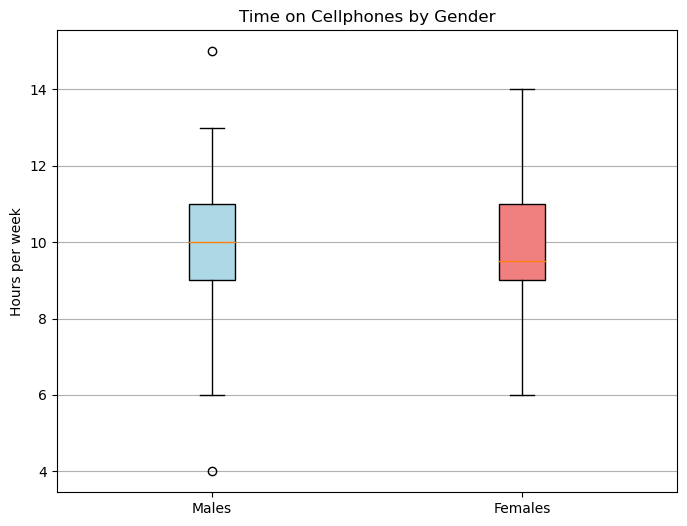

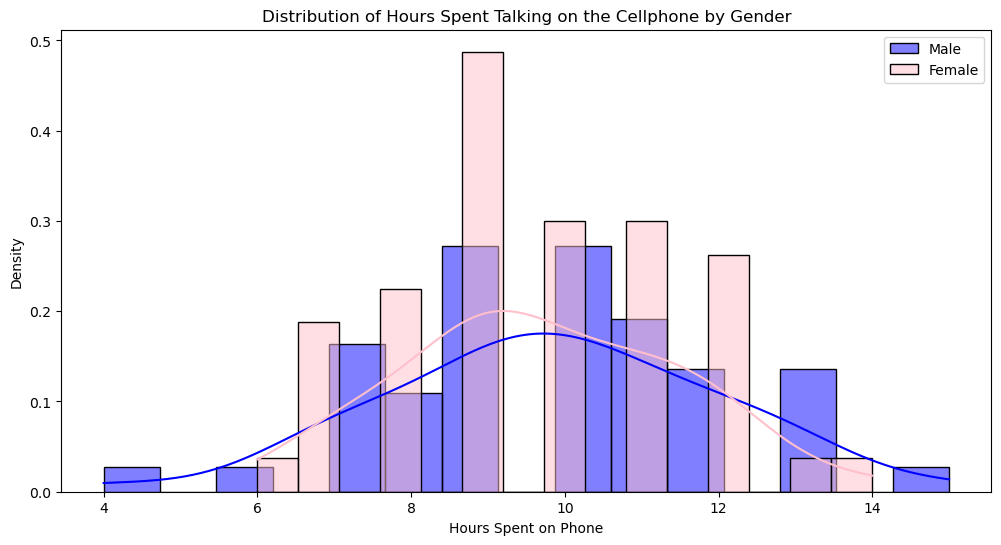

In [7]:
male_df = df['Males_Hours']
female_df = df['Females_Hours']

shapiro_male = stats.shapiro(male_df)
shapiro_female = stats.shapiro(female_df)
print(f'Shapiro-Wilk Test for Males:\n{shapiro_male}\n')
print(f'Shapiro-Wilk Test for Females:\n{shapiro_female}\n')

levene_test = stats.levene(male_df, female_df)
print(f'Levene\'s Test for Homogeneity of Variances:\n{levene_test}\n')

t_test = stats.ttest_ind(male_df, female_df)
print(f'Two Independent Samples t-test:\n{t_test}\n')

data = [male_df, female_df]
labels = ['Males', 'Females']
plt.figure(figsize=(8, 6))
box = plt.boxplot(data, labels=labels, patch_artist=True)
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Time on Cellphones by Gender')
plt.ylabel('Hours per week')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=male_df, color='blue', kde=True, stat='density', bins=15, label="Male", alpha=0.5)
sns.histplot(data=female_df, color='pink', kde=True, stat='density', bins=15, label="Female", alpha=0.5)

plt.title('Distribution of Hours Spent Talking on the Cellphone by Gender')
plt.xlabel('Hours Spent on Phone')
plt.ylabel('Density')
plt.legend()
plt.show()

# Interpretation: 
# The Shapiro-Wilk tests indicate that the hours spent on phones by both males and females follow a normal distribution.
# Levene's Test shows homogeneity of variances.
# The independent t-test results suggest that there is no significant difference in the hours spent on the phone between males 
# and females.
# The confidence intervals further solidify this claim, as the difference in means is close to zero.
# The boxplot reveals that males spend more time on their cellphones per week compared to females, with a wider interquartile 
# range indicating greater variability in male usage. While the median usage for both genders is around 10 hours, males exhibit 
# a few outliers at the higher end, suggesting that some individuals use their phones significantly more than the majority.
# The histogram illustrates that while both males and females spend varying hours on their cellphones, males tend to exhibit a 
# broader distribution, with some individuals spending significantly more time than the majority. In contrast, females show a 
# more concentrated usage pattern, particularly around the lower to moderate hours, suggesting a potential difference in 
# cellphone engagement between genders.
